In [1]:
import requests
import json
#from config import api_key
#from config import g_key
from pprint import pprint
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

query_tx_url="https://api.covidtracking.com/v1/states/tx/daily.csv"
query_ny_url="https://api.covidtracking.com/v1/states/ny/daily.csv"
query_all_url="https://api.covidtracking.com/v1/states/daily.csv"

fileTLM1_to_load = "Resources/Texas Labor Market CES Data.csv"
fileTLM2_to_load = "Resources/Texas Labor Market Indicators.csv"
fileTLM3_to_load = "Resources/Texas Labor Market LAUS Data.csv"

In [2]:
covid_tx_df = pd.read_csv(query_tx_url)
covid_tx_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200917,TX,678819,4666357.0,NaN,3246.0,NaN,1139.0,NaN,NaN,...,5345176,112,0,a2d8ac009853907290b40b8ab8254e4452e1af47,0,0,0,0,0,NaN
1,20200916,TX,674772,4624848.0,NaN,3249.0,NaN,1139.0,NaN,NaN,...,5299620,135,0,39bcdcbbba76f8495efe2744936a640bdd7b854f,0,0,0,0,0,NaN
2,20200915,TX,668746,4578796.0,NaN,3311.0,NaN,1151.0,NaN,NaN,...,5247542,132,0,d85a65d7921bdc818b5051d3785a775d6910d3ec,0,0,0,0,0,NaN
3,20200914,TX,663445,4549802.0,NaN,3391.0,NaN,1165.0,NaN,NaN,...,5213247,21,0,98edf9e5c5db37965bbfeedc526c96279b3d3d89,0,0,0,0,0,NaN
4,20200913,TX,659434,4890705.0,NaN,3319.0,NaN,1140.0,NaN,NaN,...,5550139,47,0,c99ee90e2c9eeee9d89555f71b49713f29858a7e,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,20200308,TX,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,0,0,f94e478683fbfcc8099c8c30041dbacebf8d9550,0,0,0,0,0,NaN
194,20200307,TX,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,0,0,8879e97aec342418e578906886082ae70c76bed1,0,0,0,0,0,NaN
195,20200306,TX,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,0,0,2e9ea0bb353851b7cc519c04dfb73aaa9b780b2e,0,0,0,0,0,NaN
196,20200305,TX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,b6c2d2da54bf32da455dc064c25b46362e2c5249,0,0,0,0,0,NaN


In [3]:
TLM1_data = pd.read_csv(fileTLM1_to_load)
TLM1_data.head()

,Industry,20-Jul,20-Jun,19-Jul,Monthly Change,Monthly % Change,Annual Change,Annual\n% Change,Unnamed: 8
0,TOTAL NONFARM,"12,087,800","12,145,700","12,765,800","-57,900",-0.50%,"-678,000",-5.30%,NaN
1,TOTAL PRIVATE,"10,231,200","10,254,600","10,865,900","-23,400",-0.20%,"-634,700",-5.80%,NaN
2,GOODS PRODUCING,"1,807,600","1,815,800","1,942,200","-8,200",-0.50%,"-134,600",-6.90%,NaN
3,"Mining and Logging (NAICS 21, 1133)","191,500","192,700","250,700","-1,200",-0.60%,"-59,200",-23.60%,NaN
4,Oil and Gas Extraction (NAICS 211),"70,500","69,300","77,800","1,200",1.70%,"-7,300",-9.40%,NaN


In [4]:
TLM2_data = pd.read_csv(fileTLM2_to_load)
TLM2_data.head()

,Date,Texas,U.S.,Unnamed: 3,Unnamed: 4
0,10-Jan,$21.31,$22.51,NaN,NaN
1,10-Feb,$21.41,$22.57,NaN,NaN
2,10-Mar,$21.31,$22.48,NaN,NaN
3,10-Apr,$21.42,$22.53,NaN,NaN
4,10-May,$21.39,$22.60,NaN,NaN


In [5]:
TLM3_data = pd.read_csv(fileTLM3_to_load)
TLM3_data.head()

,Metro Areas,Civilian Labor Force\nJuly\n2020,Employed\nJuly\n2020,Unemployed\nJuly\n2020,Rate\nJuly\n2020,Civilian Labor Force\nJune\n2020,Employed\nJune\n2020,Unemployed\nJune\n2020,Rate\nJune\n2020,Civilian Labor Force July\n2019,Employed\nJuly\n2019,Unemployed\nJuly\n2019,Rate\nJuly\n2019,Unnamed: 13,Unnamed: 14
0,United States,"161,374,000","144,492,000","16,882,000",10.5,"160,883,000","142,811,000","18,072,000",11.2,"164,941,000","158,385,000","6,556,000",4.0,NaN,NaN
1,Texas,"13,846,028","12,705,927","1,140,101",8.2,"13,804,456","12,606,499","1,197,957",8.7,"14,064,960","13,524,473","540,487",3.8,NaN,NaN
2,Abilene,"77,159","72,572","4,587",5.9,"76,433","71,618","4,815",6.3,"78,826","76,205","2,621",3.3,NaN,NaN
3,Amarillo,"125,356","118,920","6,436",5.1,"125,167","117,796","7,371",5.9,"132,139","128,314","3,825",2.9,NaN,NaN
4,Austin-Round Rock,"1,225,085","1,143,143","81,942",6.7,"1,215,025","1,126,397","88,628",7.3,"1,240,719","1,204,386","36,333",2.9,NaN,NaN


In [6]:
covid_ny_df = pd.read_csv(query_ny_url)
covid_ny_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200917,NY,447262,9174658,NaN,486.0,89995.0,135.0,NaN,68.0,...,9621920,3,0,5e44bc2c7424a256603012991c84a330c2f41244,0,0,0,0,0,NaN
1,20200916,NY,446366,9084050,NaN,483.0,89995.0,138.0,NaN,67.0,...,9530416,5,0,247d677a0fea26706b310e8053dd5198afd55927,0,0,0,0,0,NaN
2,20200915,NY,445714,9009615,NaN,481.0,89995.0,144.0,NaN,60.0,...,9455329,11,0,dff1d805592ccd3c7f86828c445b52061d34bd97,0,0,0,0,0,NaN
3,20200914,NY,444948,8936703,NaN,464.0,89995.0,143.0,NaN,59.0,...,9381651,4,0,6a2fb762bc87056f5df959d1f8988e03ed4f2e95,0,0,0,0,0,NaN
4,20200913,NY,444365,8873928,NaN,464.0,89995.0,131.0,NaN,54.0,...,9318293,6,0,610a4052d28f86b5f307476f7ee7dfe297d0d413,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,20200308,NY,105,92,NaN,NaN,NaN,NaN,NaN,NaN,...,197,0,0,8b4ccf56cc9ddfaacef5d4e42a99d94dfee8af12,0,0,0,0,0,NaN
194,20200307,NY,76,92,236.0,NaN,NaN,NaN,NaN,NaN,...,168,0,0,5c70fd54b6db8b216a2cbb0636071acd6a1517ca,0,0,0,0,0,NaN
195,20200306,NY,33,92,236.0,NaN,NaN,NaN,NaN,NaN,...,125,0,0,d6fb329fc7e2f5a6593ed3c3f4cdf8302dd618e0,0,0,0,0,0,NaN
196,20200305,NY,22,76,24.0,NaN,NaN,NaN,NaN,NaN,...,98,0,0,4e6700472deb64bcf0ae6c56393e0cb700af0510,0,0,0,0,0,NaN


In [7]:
covid_all_df = pd.read_csv(query_all_url)
covid_all_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200917,AK,7471.0,408392.0,NaN,41.0,NaN,NaN,NaN,13.0,...,415863,0,0,c987aced59fdca527be184aea95007bda92c8e6c,0,0,0,0,0,NaN
1,20200917,AL,141757.0,903156.0,NaN,740.0,16079.0,NaN,1631.0,NaN,...,1044913,9,137,7b8fabe0027804ca5e9aa8746d6bc84c2bab271b,0,0,0,0,0,NaN
2,20200917,AR,73211.0,783707.0,NaN,389.0,4896.0,206.0,NaN,72.0,...,856918,9,56,d4291d080980e8aead10bf45a5b14edeb443a3f2,0,0,0,0,0,NaN
3,20200917,AS,0.0,1571.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1571,0,0,54f9bc2755f89f45c7a1fa08c2b1a68d14fdc849,0,0,0,0,0,NaN
4,20200917,AZ,211660.0,1141222.0,NaN,594.0,21821.0,119.0,NaN,65.0,...,1352882,38,-4,b3a07035b8f160353f11eaf1db9940a0390ebf8a,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11069,20200124,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,6f40087f42d06db4121e09b184785b4110cd4df8,0,0,0,0,0,NaN
11070,20200123,MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,885628de5b5c6da109b79adb7faad55e4815624a,0,0,0,0,0,NaN
11071,20200123,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,978c05d8a7a9d46e9fa826d83215f5b9732f2c6d,0,0,0,0,0,NaN
11072,20200122,MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0f3eebd5c4a00d0aaa235b0534bd4243794652b6,0,0,0,0,0,NaN


In [8]:
covid_tx_df['date'] = pd.to_datetime(covid_tx_df['date'], format='%Y%m%d')
covid_ny_df['date'] = pd.to_datetime(covid_ny_df['date'], format='%Y%m%d')
covid_all_df['date'] = pd.to_datetime(covid_all_df['date'], format='%Y%m%d')

In [9]:
covid_tx_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-17,TX,678819,4666357.0,NaN,3246.0,NaN,1139.0,NaN,NaN,...,5345176,112,0,a2d8ac009853907290b40b8ab8254e4452e1af47,0,0,0,0,0,NaN
1,2020-09-16,TX,674772,4624848.0,NaN,3249.0,NaN,1139.0,NaN,NaN,...,5299620,135,0,39bcdcbbba76f8495efe2744936a640bdd7b854f,0,0,0,0,0,NaN
2,2020-09-15,TX,668746,4578796.0,NaN,3311.0,NaN,1151.0,NaN,NaN,...,5247542,132,0,d85a65d7921bdc818b5051d3785a775d6910d3ec,0,0,0,0,0,NaN
3,2020-09-14,TX,663445,4549802.0,NaN,3391.0,NaN,1165.0,NaN,NaN,...,5213247,21,0,98edf9e5c5db37965bbfeedc526c96279b3d3d89,0,0,0,0,0,NaN
4,2020-09-13,TX,659434,4890705.0,NaN,3319.0,NaN,1140.0,NaN,NaN,...,5550139,47,0,c99ee90e2c9eeee9d89555f71b49713f29858a7e,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2020-03-08,TX,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,0,0,f94e478683fbfcc8099c8c30041dbacebf8d9550,0,0,0,0,0,NaN
194,2020-03-07,TX,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,0,0,8879e97aec342418e578906886082ae70c76bed1,0,0,0,0,0,NaN
195,2020-03-06,TX,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,0,0,2e9ea0bb353851b7cc519c04dfb73aaa9b780b2e,0,0,0,0,0,NaN
196,2020-03-05,TX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,b6c2d2da54bf32da455dc064c25b46362e2c5249,0,0,0,0,0,NaN


In [10]:
covid_ny_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-17,NY,447262,9174658,NaN,486.0,89995.0,135.0,NaN,68.0,...,9621920,3,0,5e44bc2c7424a256603012991c84a330c2f41244,0,0,0,0,0,NaN
1,2020-09-16,NY,446366,9084050,NaN,483.0,89995.0,138.0,NaN,67.0,...,9530416,5,0,247d677a0fea26706b310e8053dd5198afd55927,0,0,0,0,0,NaN
2,2020-09-15,NY,445714,9009615,NaN,481.0,89995.0,144.0,NaN,60.0,...,9455329,11,0,dff1d805592ccd3c7f86828c445b52061d34bd97,0,0,0,0,0,NaN
3,2020-09-14,NY,444948,8936703,NaN,464.0,89995.0,143.0,NaN,59.0,...,9381651,4,0,6a2fb762bc87056f5df959d1f8988e03ed4f2e95,0,0,0,0,0,NaN
4,2020-09-13,NY,444365,8873928,NaN,464.0,89995.0,131.0,NaN,54.0,...,9318293,6,0,610a4052d28f86b5f307476f7ee7dfe297d0d413,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2020-03-08,NY,105,92,NaN,NaN,NaN,NaN,NaN,NaN,...,197,0,0,8b4ccf56cc9ddfaacef5d4e42a99d94dfee8af12,0,0,0,0,0,NaN
194,2020-03-07,NY,76,92,236.0,NaN,NaN,NaN,NaN,NaN,...,168,0,0,5c70fd54b6db8b216a2cbb0636071acd6a1517ca,0,0,0,0,0,NaN
195,2020-03-06,NY,33,92,236.0,NaN,NaN,NaN,NaN,NaN,...,125,0,0,d6fb329fc7e2f5a6593ed3c3f4cdf8302dd618e0,0,0,0,0,0,NaN
196,2020-03-05,NY,22,76,24.0,NaN,NaN,NaN,NaN,NaN,...,98,0,0,4e6700472deb64bcf0ae6c56393e0cb700af0510,0,0,0,0,0,NaN


In [11]:
covid_all_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-17,AK,7471.0,408392.0,NaN,41.0,NaN,NaN,NaN,13.0,...,415863,0,0,c987aced59fdca527be184aea95007bda92c8e6c,0,0,0,0,0,NaN
1,2020-09-17,AL,141757.0,903156.0,NaN,740.0,16079.0,NaN,1631.0,NaN,...,1044913,9,137,7b8fabe0027804ca5e9aa8746d6bc84c2bab271b,0,0,0,0,0,NaN
2,2020-09-17,AR,73211.0,783707.0,NaN,389.0,4896.0,206.0,NaN,72.0,...,856918,9,56,d4291d080980e8aead10bf45a5b14edeb443a3f2,0,0,0,0,0,NaN
3,2020-09-17,AS,0.0,1571.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1571,0,0,54f9bc2755f89f45c7a1fa08c2b1a68d14fdc849,0,0,0,0,0,NaN
4,2020-09-17,AZ,211660.0,1141222.0,NaN,594.0,21821.0,119.0,NaN,65.0,...,1352882,38,-4,b3a07035b8f160353f11eaf1db9940a0390ebf8a,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11069,2020-01-24,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,6f40087f42d06db4121e09b184785b4110cd4df8,0,0,0,0,0,NaN
11070,2020-01-23,MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,885628de5b5c6da109b79adb7faad55e4815624a,0,0,0,0,0,NaN
11071,2020-01-23,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,978c05d8a7a9d46e9fa826d83215f5b9732f2c6d,0,0,0,0,0,NaN
11072,2020-01-22,MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0f3eebd5c4a00d0aaa235b0534bd4243794652b6,0,0,0,0,0,NaN


In [12]:
covid_tx_df.set_index('date')

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-09-17,TX,678819,4666357.0,NaN,3246.0,NaN,1139.0,NaN,NaN,NaN,...,5345176,112,0,a2d8ac009853907290b40b8ab8254e4452e1af47,0,0,0,0,0,NaN
2020-09-16,TX,674772,4624848.0,NaN,3249.0,NaN,1139.0,NaN,NaN,NaN,...,5299620,135,0,39bcdcbbba76f8495efe2744936a640bdd7b854f,0,0,0,0,0,NaN
2020-09-15,TX,668746,4578796.0,NaN,3311.0,NaN,1151.0,NaN,NaN,NaN,...,5247542,132,0,d85a65d7921bdc818b5051d3785a775d6910d3ec,0,0,0,0,0,NaN
2020-09-14,TX,663445,4549802.0,NaN,3391.0,NaN,1165.0,NaN,NaN,NaN,...,5213247,21,0,98edf9e5c5db37965bbfeedc526c96279b3d3d89,0,0,0,0,0,NaN
2020-09-13,TX,659434,4890705.0,NaN,3319.0,NaN,1140.0,NaN,NaN,NaN,...,5550139,47,0,c99ee90e2c9eeee9d89555f71b49713f29858a7e,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08,TX,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,0,0,f94e478683fbfcc8099c8c30041dbacebf8d9550,0,0,0,0,0,NaN
2020-03-07,TX,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,0,0,8879e97aec342418e578906886082ae70c76bed1,0,0,0,0,0,NaN
2020-03-06,TX,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,0,0,2e9ea0bb353851b7cc519c04dfb73aaa9b780b2e,0,0,0,0,0,NaN


In [13]:
covid_ny_df.set_index('date')

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-09-17,NY,447262,9174658,NaN,486.0,89995.0,135.0,NaN,68.0,NaN,...,9621920,3,0,5e44bc2c7424a256603012991c84a330c2f41244,0,0,0,0,0,NaN
2020-09-16,NY,446366,9084050,NaN,483.0,89995.0,138.0,NaN,67.0,NaN,...,9530416,5,0,247d677a0fea26706b310e8053dd5198afd55927,0,0,0,0,0,NaN
2020-09-15,NY,445714,9009615,NaN,481.0,89995.0,144.0,NaN,60.0,NaN,...,9455329,11,0,dff1d805592ccd3c7f86828c445b52061d34bd97,0,0,0,0,0,NaN
2020-09-14,NY,444948,8936703,NaN,464.0,89995.0,143.0,NaN,59.0,NaN,...,9381651,4,0,6a2fb762bc87056f5df959d1f8988e03ed4f2e95,0,0,0,0,0,NaN
2020-09-13,NY,444365,8873928,NaN,464.0,89995.0,131.0,NaN,54.0,NaN,...,9318293,6,0,610a4052d28f86b5f307476f7ee7dfe297d0d413,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-08,NY,105,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,197,0,0,8b4ccf56cc9ddfaacef5d4e42a99d94dfee8af12,0,0,0,0,0,NaN
2020-03-07,NY,76,92,236.0,NaN,NaN,NaN,NaN,NaN,NaN,...,168,0,0,5c70fd54b6db8b216a2cbb0636071acd6a1517ca,0,0,0,0,0,NaN
2020-03-06,NY,33,92,236.0,NaN,NaN,NaN,NaN,NaN,NaN,...,125,0,0,d6fb329fc7e2f5a6593ed3c3f4cdf8302dd618e0,0,0,0,0,0,NaN


In [14]:
covid_all_df.set_index('date')

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-09-17,AK,7471.0,408392.0,NaN,41.0,NaN,NaN,NaN,13.0,NaN,...,415863,0,0,c987aced59fdca527be184aea95007bda92c8e6c,0,0,0,0,0,NaN
2020-09-17,AL,141757.0,903156.0,NaN,740.0,16079.0,NaN,1631.0,NaN,900.0,...,1044913,9,137,7b8fabe0027804ca5e9aa8746d6bc84c2bab271b,0,0,0,0,0,NaN
2020-09-17,AR,73211.0,783707.0,NaN,389.0,4896.0,206.0,NaN,72.0,619.0,...,856918,9,56,d4291d080980e8aead10bf45a5b14edeb443a3f2,0,0,0,0,0,NaN
2020-09-17,AS,0.0,1571.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1571,0,0,54f9bc2755f89f45c7a1fa08c2b1a68d14fdc849,0,0,0,0,0,NaN
2020-09-17,AZ,211660.0,1141222.0,NaN,594.0,21821.0,119.0,NaN,65.0,NaN,...,1352882,38,-4,b3a07035b8f160353f11eaf1db9940a0390ebf8a,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-24,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,6f40087f42d06db4121e09b184785b4110cd4df8,0,0,0,0,0,NaN
2020-01-23,MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,885628de5b5c6da109b79adb7faad55e4815624a,0,0,0,0,0,NaN
2020-01-23,WA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,978c05d8a7a9d46e9fa826d83215f5b9732f2c6d,0,0,0,0,0,NaN


In [15]:
clean_tx = covid_tx_df[["date", "state", "positive", "negative", "recovered", "death"]]
clean_tx.head()

,date,state,positive,negative,recovered,death
0,2020-09-17,TX,678819,4666357.0,594817.0,14590.0
1,2020-09-16,TX,674772,4624848.0,590837.0,14478.0
2,2020-09-15,TX,668746,4578796.0,585912.0,14343.0
3,2020-09-14,TX,663445,4549802.0,581204.0,14211.0
4,2020-09-13,TX,659434,4890705.0,577832.0,14190.0


In [16]:
clean_ny = covid_ny_df[["date", "state", "positive", "negative", "recovered", "death"]]
clean_ny.head()

,date,state,positive,negative,recovered,death
0,2020-09-17,NY,447262,9174658,75962.0,25413.0
1,2020-09-16,NY,446366,9084050,75903.0,25410.0
2,2020-09-15,NY,445714,9009615,75847.0,25405.0
3,2020-09-14,NY,444948,8936703,75814.0,25394.0
4,2020-09-13,NY,444365,8873928,75767.0,25390.0


In [17]:
clean_all = covid_all_df[["date", "state", "positive", "negative", "recovered", "death"]]
clean_all.head()

,date,state,positive,negative,recovered,death
0,2020-09-17,AK,7471.0,408392.0,2408.0,44.0
1,2020-09-17,AL,141757.0,903156.0,61232.0,2401.0
2,2020-09-17,AR,73211.0,783707.0,64145.0,1166.0
3,2020-09-17,AS,0.0,1571.0,NaN,0.0
4,2020-09-17,AZ,211660.0,1141222.0,33381.0,5409.0


Text(0, 0.5, 'New York')

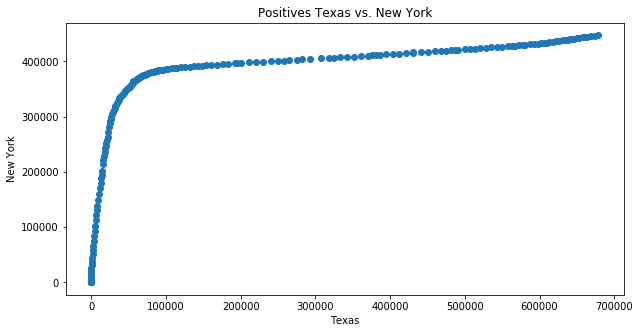

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(clean_tx["positive"], clean_ny["positive"])
plt.title("Positives Texas vs. New York")
plt.xlabel("Texas")
plt.ylabel("New York")

In [ ]:
import

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(clean_tx["positive"], clean_ny["positive"])
plt.title("Texas Covid positives vs. Texas Unemployment")
plt.xlabel("Texas")
plt.ylabel("New York")